In [138]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [139]:
f0 = 150    #Fréquence fondamentale
tps = 1.2   #Durée du son
fe = 8000   #Fréquence d'échantillonage

vt = np.linspace(0, tps, int(tps*fe))   #Vecteur temps

# Fonction Sinus

In [140]:
def sin(f, A, phi, t):
    return A * np.sin(2 * np.pi * f * t + phi)

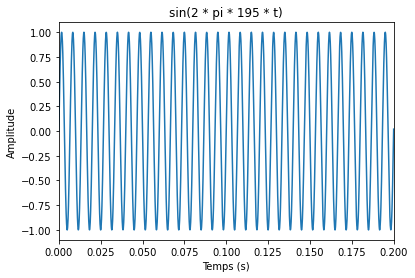

In [141]:
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("sin(2 * pi * 195 * t)")

plt.xlim(0,0.2)

plt.plot(vt, sin(f0, 1, 0, vt))

plt.show()

# Calcule des C<sub>n<sub>

In [175]:
def calculeCN(f0, cn1, limite=3000):

    pics = np.zeros(int(limite/f0)+1)
    i = 1

    while(f0 * i <= limite):
        pics[i] = cn1/(4**(i-1))
        i += 1

    return pics

pics = calculeCN(f0, 8.2)


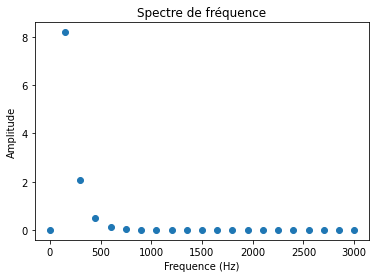

In [185]:
plt.title("Spectre de fréquence")
plt.xlabel("Frequence (Hz)")
plt.ylabel("Amplitude")
plt.scatter(np.asarray(range(len(pics)))*f0, pics)
plt.show()

Transfmoration en sinus

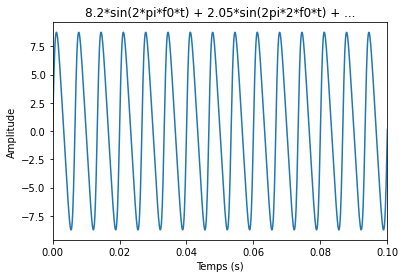

In [173]:
def signalFromCn(cn, vt, f0):

    signal = np.zeros(len(vt))

    for i in range(len(cn)):
        signal += sin(f0*i, cn[i], 0, vt)

    return signal

signal = signalFromCn(pics, vt, f0)

plt.xlim(0,0.1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("8.2*sin(2*pi*f0*t) + 2.05*sin(2pi*2*f0*t) + ...")
plt.plot(vt, signal)
plt.show()

In [145]:
Audio(signal, rate=fe)

Remontée des C<sub>n</sub>

In [146]:
def remontePics(frequences, f0, pics, err, amplitudes):

    picsUp = pics.copy()

    for i in range(len(frequences)):
        for j in range(len(pics)):
            if(j*f0 >= frequences[i] - err and j*f0 <= frequences[i] + err):
                picsUp[j] = amplitudes[i]

    return picsUp

# Génération du son /u/

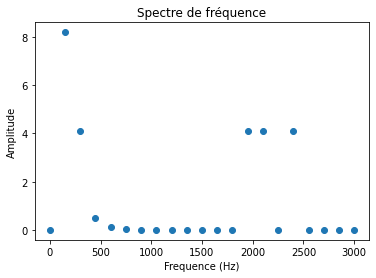

In [186]:
#son u
frequences = [315, 2040, 2440]
amplitudes = [4.1, 4.1, 4.1]
picsU  = remontePics(frequences, f0, pics, 100, amplitudes)

plt.title("Spectre de fréquence")
plt.xlabel("Frequence (Hz)")
plt.ylabel("Amplitude")
plt.scatter(np.asarray(range(len(pics)))*f0, picsU)
plt.show()

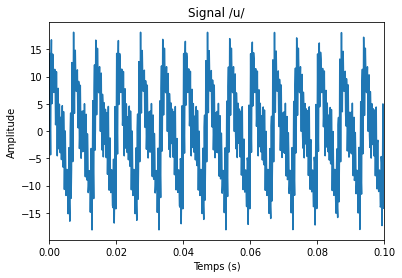

In [197]:
signalU = signalFromCn(picsU, vt, f0)

plt.xlim(0, 0.1)
plt.title("Signal /u/")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, signalU)
plt.show()

In [182]:
Audio(signalU, rate=fe)

# Génération du son /e/

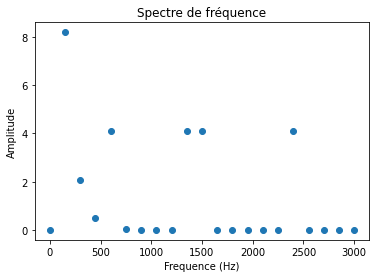

In [187]:
#son e
frequences = [560, 1440, 2440]
amplitudes = [4.1, 4.1, 4.1]
picsE  = remontePics(frequences, f0, pics, 100, amplitudes)

plt.title("Spectre de fréquence")
plt.xlabel("Frequence (Hz)")
plt.ylabel("Amplitude")
plt.scatter(np.asarray(range(len(pics)))*f0, picsE)
plt.show()

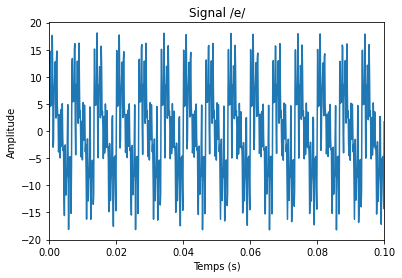

In [195]:
signalE = signalFromCn(picsE, vt, f0)

plt.xlim(0, 0.1)
plt.title("Signal /e/")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, signalE)
plt.show()

In [152]:
Audio(signalE, rate=fe)

# Combinaison /u//e/

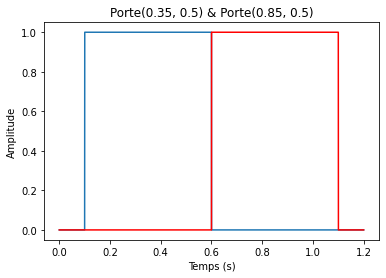

In [198]:
def porte(vt, centre, largeur):
    
    p = np.zeros(vt.shape[0])
    
    for i in range(len(vt)):
        if vt[i] >= centre - largeur/2 and vt[i] <= centre + largeur/2:
            p[i] = 1
    
    return p

pU = porte(vt, 0.35, 0.5)
pE = porte(vt, 0.85, 0.5)


plt.title("Porte(0.35, 0.5) & Porte(0.85, 0.5)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, pU)
plt.plot(vt, pE, color="red")
plt.show()

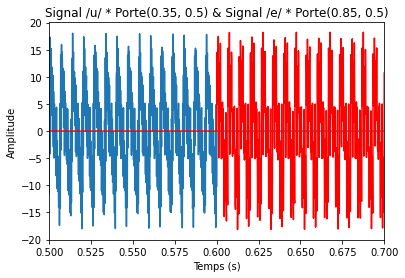

In [199]:
plt.xlim(0.5, 0.7)
plt.title("Signal /u/ * Porte(0.35, 0.5) & Signal /e/ * Porte(0.85, 0.5)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, pU*signalU)
plt.plot(vt, pE*signalE, color="red")
plt.show()

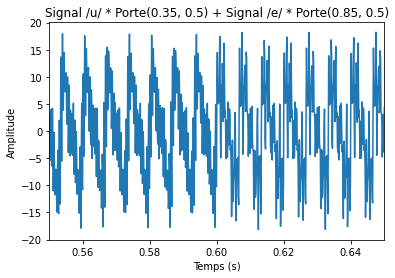

In [200]:
plt.xlim(0.55, 0.65)
plt.title("Signal /u/ * Porte(0.35, 0.5) + Signal /e/ * Porte(0.85, 0.5)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, pU*signalU+pE*signalE)
plt.show()

In [183]:
Audio(pU*signalU+pE*signalE, rate=fe)

# Génération du son /a/

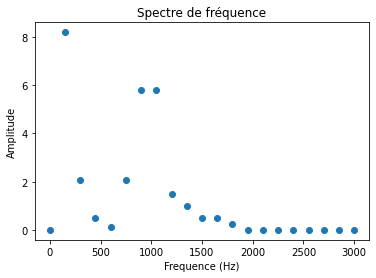

In [191]:
#son A
frequences = [780, 975, 1170, 1365, 1560, 1755]
amplitudes = [2.05, 5.8, 1.5, 1, 0.5, 0.25]
picsA  = remontePics(frequences, f0, pics, 100, amplitudes)


plt.title("Spectre de fréquence")
plt.xlabel("Frequence (Hz)")
plt.ylabel("Amplitude")
plt.scatter(np.asarray(range(len(picsA)))*f0, picsA)
plt.show()

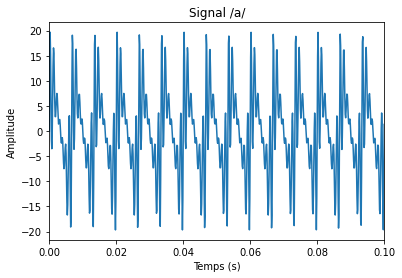

In [193]:
signalA = signalFromCn(picsA, vt, f0)

plt.xlim(0,0.1)
plt.title("Signal /a/")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.plot(vt, signalA)
plt.show()

Audio(signalA, rate=fe)